In [25]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from collections import Counter
import os
import torchvision.transforms.functional as TF

# Random Prototyping

In [40]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: TF.rotate(x, -90)), transforms.Lambda(lambda x: TF.hflip(x)), transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.EMNIST(root='./data', split='byclass', train=True, download=False, transform=transform)
test_set = torchvision.datasets.EMNIST(root='./data', split='byclass', train=False, download=False, transform=transform)

# Convert dataset to DataLoader (load all at once)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=False)

# Extract train and test data
train_data, train_labels = next(iter(train_loader))
test_data, test_labels = next(iter(test_loader))

# Flatten images from (N, 1, 28, 28) -> (N, 784)
train_data = train_data.view(train_data.shape[0], -1).to(device)  # (60000, 784)
test_data = test_data.view(test_data.shape[0], -1).to(device)  # (10000, 784)

train_labels = train_labels.to(device)
test_labels = test_labels.to(device)

Using device: cpu


In [41]:
mapping_path = './data/EMNIST/raw/emnist-byclass-mapping.txt'
mapping = pd.read_csv(mapping_path, delimiter=' ', header=None, index_col=0)
label_to_char = {index: chr(row[1]) for index, row in mapping.iterrows()}
train_labels = [label_to_char[label.item()] for label in train_labels]
test_labels = [label_to_char[label.item()] for label in test_labels]

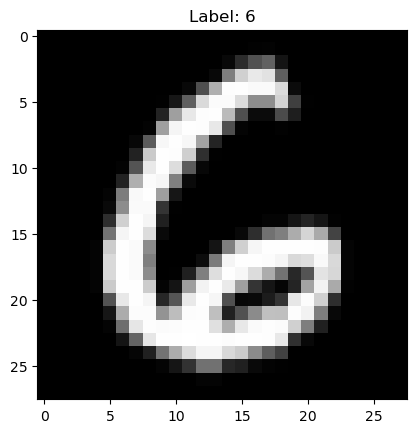

In [42]:
img, label = train_data[900], train_labels[900]  # Get first image & label
plt.imshow(img.view(28,28), cmap="gray")
plt.title(f"Label: {label}")
plt.show()